# Chapter 4 Algebra And Symbolic Math With Sympy

## Defining Symbols and Symbolic Operations
SymPy lets us write programs where we can express and evaluate mathe- matical expressions in terms of such symbols. To use a symbol in your pro- gram, you have to create an object of the Symbol class,

In [1]:
from sympy import Symbol
x = Symbol('x')

In [2]:
x + x + 1

2*x + 1

In [3]:
a = Symbol('x')
a + a + 1

2*x + 1

In [4]:
x.name

'x'

In [5]:
a.name

'x'

In [6]:
# multiple simbols
from sympy import symbols
x, y, z = symbols('x,y,z')
s = x*y + x*y
s

2*x*y

In [7]:
p = (x+2)*(x+3)
p

(x + 2)*(x + 3)

## Working with Expressions

### Factorizing and Expanding Expressions

In [9]:
from sympy import Symbol as sb
from sympy import factor
x = sb('x')
y = sb('y')

expr = x**2 - y**2
factor(expr)

(x - y)*(x + y)

In [11]:
factors = factor(expr)

In [12]:
dir(factors)

['__abs__',
 '__add__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '_accept_eval_derivative',
 '_args',
 '_assumptions',
 '_combine_inverse',
 '_compare_pretty',
 '_constructor_postprocessor_mapping',
 '_diff_wrt',
 '_eval_adjoint',
 '_eval_as_leading_term',
 '_eval_conjugate',
 '_eval_derivative',
 '_e

In [13]:
# this part originally is expand(factors).
factors.expand()

x**2 - y**2

In [15]:
expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
factors = factor(expr)
factors

(x + y)**3

In [16]:
factors.expand()

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [17]:
expr = x+y+x*y
factor(expr)

x*y + x + y

### Pretty Printing
If you want the expressions we’ve been working with to look a bit nicer when you print them, you can use the pprint() function.

In [18]:
expr = x*x + 2*x*y + y*y
expr

x**2 + 2*x*y + y**2

In [19]:
from sympy import pprint
pprint(expr)

 2            2
x  + 2⋅x⋅y + y 


In [20]:
expr = 1+2*x + 2*x**2
pprint(expr)

   2          
2⋅x  + 2⋅x + 1


In [21]:
expr

2*x**2 + 2*x + 1

If you want the expression in the opposite order, with the highest power of x last, you can make that happen with the init_printing() function

In [22]:
from sympy import init_printing
init_printing(order='rev-lex')
pprint(expr)

   2          
2⋅x  + 2⋅x + 1


### Printing a Series

In [24]:
from sympy import Symbol, pprint, init_printing
def print_series(n):
    
    # Initializing printing system with reverse order
    init_printing(order='rev-lex')
    
    x = sb('x')
    series = x
    for i in range(2, n+1):
        series = series + (x**i)/i
    pprint(series)
n = input('Enter the number of terms  you want in the series: ')
print_series(int(n))

Enter the number of terms  you want in the series: 6
 6    5    4    3    2    
x    x    x    x    x     
── + ── + ── + ── + ── + x
6    5    4    3    2     


### Substituting in Values
See how we can use SymPy to plug values into an algebraic expression.
This will let us calculate the value of the expression for certain values of the 22
variables

In [27]:
x = sb('x')
y = sb('y')
expr = x*x + x*y + x*y + y*y

# 原书中是expr.subs({x:1, y:2})
res = expr.evalf(subs={x:1, y:2})

In [28]:
res

In [29]:
expr.subs({x:1, y:2})

You can also express one symbol in terms of another and substitute accordingly, using the subs() method

In [33]:
expr_subs = expr.subs({x:1-y})

In [34]:
from sympy import simplify
simplify(expr_subs)

### Calulating the Value of Series

In [35]:
from sympy import Symbol, pprint, init_printing
def print_series(n, x_value):
    
    # Initialize printing system with reverse order
    init_printing(order='rev-lex')
    
    x = Symbol('x')
    series = x
    for i in range(2, n+1):
        series = series + (x**i)/i
    pprint(series)
    
    # Evaluate the series at x_value
    series_value = series.subs({x:x_value})
    print("Value of the series at {0}:{1}".format(x_value, series_value))

In [38]:
n = input("Enter the number of terms you want in the series: ")
x_value = input("Enter the value of x at which you want to evaluate the series:")

print_series(int(n), float(x_value))

Enter the number of terms you want in the series: 4
Enter the value of x at which you want to evaluate the series:4
 4    3    2    
x    x    x     
── + ── + ── + x
4    3    2     
Value of the series at 4.0:97.3333333333333


### Converting Strings to Mathematical Expressions

In [39]:
from sympy import sympify
expr = input('Enter a mathematical expression: ')

Enter a mathematical expression: x**2 + 3*x + x**3 + 2*x


In [40]:
expr = simplify(expr)
2*expr

In [43]:
from sympy.core.sympify import SympifyError
expr = input('Enter a mathematical expression:')

Enter a mathematical expression:x**2 + 3*x + x**3 + 2x


In [44]:
try:
    expr = sympify(expr)
except SympifyError:
    print("Invalid input")
    

Invalid input


### Expression Multiplier

In [47]:
from sympy import expand, sympify
from sympy.core.sympify import SympifyError

def product(expr1, expr2):
    prod = (expr1*expr2).expand()
    print(prod)

expr1 = input("The first expression: ")
expr2 = input("The second expression: ")

try:
    expr1 = sympify(expr1)
    expr2 = sympify(expr2)
except SympifyError:
    print("Invalid input")
else:
    product(expr1, expr2)

The first expression: x**2 + x*2 + x
The second expression: x**3 + x*3 + x
x**5 + 3*x**4 + 4*x**3 + 12*x**2


## Solving Equations
When we use solve(), it calculates the value of 'x' as 12 because that’s the value that makes the expression (x − 5 − 7) equal to zero.

In [48]:
from sympy import Symbol, solve
x = Symbol('x')
expr = x -5-7
solve(expr)

### Solving Quadratic Equations

In [49]:
from sympy import solve
x = Symbol('x')
expr = x**2 + 5*x + 4
solve(expr, dict=True)

In [50]:
x = Symbol('x')
expr = x**2 + x + 1
solve(expr, dict=True)

### Solving for One Variable in Terms of Others

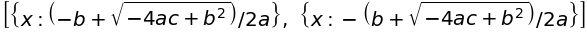

In [52]:
x, a, b, c = symbols('x,a,b,c')
expr = a*x*x + b*x + c
solve(expr, x, dict = True)

In [53]:
from sympy import Symbol, solve, pprint

s = Symbol('s')
u = Symbol('u')
t = Symbol('t')
a = Symbol('a')

expr = u*t + 0.5*a*t*t - s
t_expr=solve(expr, t, dict=True)
pprint(t_expr)

⎡⎧           ______________⎫  ⎧    ⎛       ______________⎞ ⎫⎤
⎢⎪          ╱            2 ⎪  ⎪    ⎜      ╱            2 ⎟ ⎪⎥
⎢⎨   -u + ╲╱  2.0⋅a⋅s + u  ⎬  ⎨   -⎝u + ╲╱  2.0⋅a⋅s + u  ⎠ ⎬⎥
⎢⎪t: ──────────────────────⎪, ⎪t: ─────────────────────────⎪⎥
⎣⎩             a           ⎭  ⎩               a            ⎭⎦


### Solving a System of Linear Equations

In [54]:
x = Symbol('x')
y = Symbol('y')
expr1 = 2*x + 3*y -6
expr2 = 3*x + 2*y -12
solve((expr1, expr2), dict=True)

In [58]:
soln = solve((expr1, expr2), dict=True)
soln = soln[0]
expr1.subs({x:soln[x], y:soln[y]})

In [59]:
expr2.subs({x:soln[x], y:soln[y]})

## Plotting Using Sympy

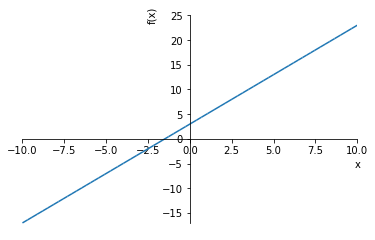

In [61]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2*x+3)

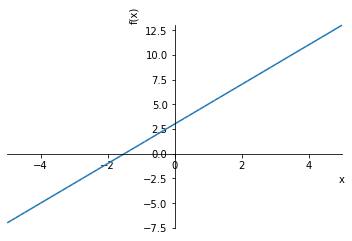

In [62]:
# a tuple consisting of the symbol, the lower bound, and the upper bound of the range—(x, -5, 5)
# is specified as the second argument to the plot() function.
plot((2*x+3), (x, -5, 5))

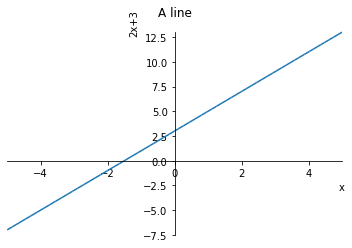

In [63]:
plot(2*x+3, (x,-5,5), title='A line', xlabel='x', ylabel='2x+3')

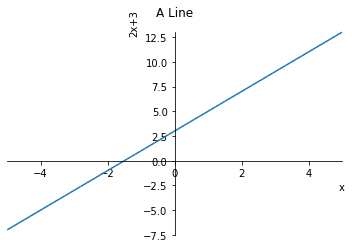

In [64]:
# No graph will be shown but the graph will be downloaded
p = plot(2*x + 3, (x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3', show=False)
p.save('line.png')

### Plotting Expressions Input by the User

In [66]:
expr = input("Enter an expression: ")
expr = sympify(expr)
y = Symbol('y')
solve(expr, y)

Enter an expression: 2*x+3*y-6


In [67]:
solutions = solve(expr, 'y')
expr_y = solutions[0]
expr_y

Enter your expression in terms of x and y: 3*x+8*y


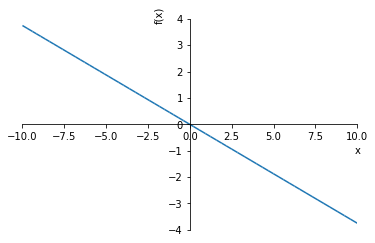

In [68]:
from sympy import Symbol, sympify, solve
from sympy.plotting import plot

def plot_expression(expr):
    y = Symbol('y')
    solutions = solve(expr, y)
    expr_y = solutions[0]
    plot(expr_y)
    
expr = input('Enter your expression in terms of x and y: ')
try: 
    expr = sympify(expr)
except SympifyError:
    print('Invalid input')
else:
    plot_expression(expr)

### Plotting Multiple Functions

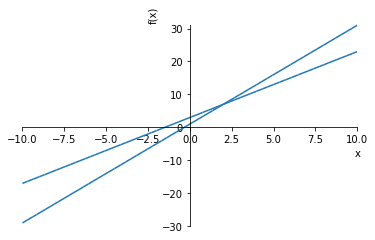

In [70]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2*x+3, 3*x+1)

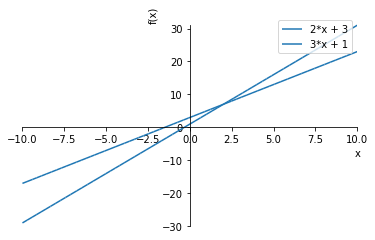

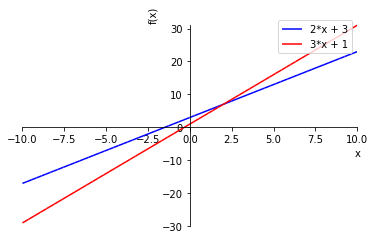

In [72]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
p = plot(2*x+3, 3*x+1, legend=True)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

#4: Solving Single-Variable Inequalities

In [77]:
# To solve a polynomial inequality, use the solve_poly_inequality() function
from sympy import Poly, Symbol, solve_poly_inequality
x = Symbol('x')
ineq_obj = -x**2 +4 < 0
# Left Hand Side
lhs = ineq_obj.lhs
p = Poly(lhs, x)
# Get Operation(less than <)
rel = ineq_obj.rel_op
solve_poly_inequality(p, rel)

In [81]:
# For rational inequalities, use the solve_rational_inequalities() function
from sympy import Symbol, Poly, solve_rational_inequalities
x = Symbol('x')
ineq_obj = ((x-1)/(x+2)) > 0
lhs = ineq_obj.lhs
numer, denom = lhs.as_numer_denom()
p1 = Poly(numer)
p2 = Poly(denom)
rel = ineq_obj.rel_op
solve_rational_inequalities([[((p1, p2), rel)]])

In [84]:
"""
sinx − 0.6 > 0 is an example of an inequality that belongs to 
neither the polynomial nor rational expression categories. 
If you have such an inequality to solve, 
use the solve_univariate_inequality() function
"""

from sympy import Symbol, solve, solve_univariate_inequality, sin
x = Symbol('x')
ineq_obj = sin(x)- 0.6 > 0
solve_univariate_inequality(ineq_obj, x, relational=False)


In [85]:
x = Symbol('x')
expr = x**2 -4
expr.is_polynomial()

True

In [86]:
expr = 2*sin(x) + 3
expr.is_polynomial()

False

In [87]:
expr = (2+x)/(3+x)
expr.is_rational_function()

True

In [88]:
expr = 2+x
expr.is_rational_function()

True

In [89]:
expr = 2*sin(x)
expr.is_rational_function()

False

In [90]:
from sympy import sympify
sympify('x+3>0')